In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

''

1-legitimate
0-phishing

In [4]:
df_u = pd.read_csv("URL_dataset.csv")
df_u.head(10)

,url,type
0,https://www.google.com,legitimate
1,https://www.youtube.com,legitimate
2,https://www.facebook.com,legitimate
3,https://www.baidu.com,legitimate
4,https://www.wikipedia.org,legitimate
5,https://www.reddit.com,legitimate
6,https://www.yahoo.com,legitimate
7,https://www.google.co.in,legitimate
8,https://www.qq.com,legitimate
9,https://www.amazon.com,legitimate


In [5]:
df_u['result'] = df_u['type'].map({'legitimate': 1, 'phishing': 0})
df_u.drop(columns=['type'], inplace=True)  # Remove the old 'type' column
df_u.head(10)


,url,result
0,https://www.google.com,1
1,https://www.youtube.com,1
2,https://www.facebook.com,1
3,https://www.baidu.com,1
4,https://www.wikipedia.org,1
5,https://www.reddit.com,1
6,https://www.yahoo.com,1
7,https://www.google.co.in,1
8,https://www.qq.com,1
9,https://www.amazon.com,1


In [6]:
df_p = pd.read_csv("verified_online.csv")
df_p = df_p[['url']]
df_p["result"] = 0
df_p.head(10)

,url,result
0,https://pay.pagsuplementos.com/order/35QRJvB3,0
1,https://multidappauth.xyz,0
2,https://olx-pl.preownedproducts.sbs/payment/bf...,0
3,https://olx-pl.preownedproducts.sbs/payment/bf...,0
4,https://olx-pl.preownedproducts.sbs/payment/bf...,0
5,https://olx-pl.preownedproducts.sbs/payment/bf...,0
6,https://olx-pl.preownedproducts.sbs/payment/bf...,0
7,https://cdrqiwuw.wixsite.com/my-site-1,0
8,https://sdyhvu9.z13.web.core.windows.net/win/i...,0
9,https://one-web.app.link/e/facebook,0


df_c - combined dataset

In [7]:
df = pd.concat([df_u, df_p]).drop_duplicates(subset=['url']).reset_index(drop=True)

# Shuffle rows
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)


,url,result
0,https://www.music.yahoo.com/manuel-romero/tracks/,1
1,https://www.costadelsol.net/web/yunquera/Index...,1
2,https://www.countyseatsproject.com/,1
3,https://www.afterelton.com/briefs-02-03-2011,1
4,http://198.167.140.90/bins.sh,0
5,https://www.pornographicfilm.lg-samsung.com/,1
6,http://larah.in/rdccc1/rdc/rdc/pro/enterprise....,0
7,https://www.linkedin.com/directory/people/cadi...,1
8,https://ipfs.best-practice.se/ipfs/bafybeic5pq...,0
9,https://www.workingmontrealjobs.canada.com/car...,1


In [8]:
print(df["result"].value_counts())

result
1    345738
0    169486
Name: count, dtype: int64


In [9]:
from urllib.parse import urlparse
import pandas as pd

# Safely compute hostname length
def safe_hostname_length(url):
    try:
        if pd.isna(url) or not isinstance(url, str) or url.strip() == "":
            return 0
        parsed = urlparse(url if "://" in url else "http://" + url)
        return len(parsed.netloc)
    except Exception as e:
        return 0

df['url_length'] = df['url'].apply(lambda i: len(str(i)))
df['hostname_length'] = df['url'].apply(safe_hostname_length)
df['path_length'] = df['url'].apply(lambda i: len(urlparse("http://" + str(i)).path) if pd.notna(i) else 0)


In [10]:
from urllib.parse import urlparse

def fd_length(url):
    try:
        url = str(url)
        parsed = urlparse(url)
        path_parts = parsed.path.split('/')
        if len(path_parts) > 1 and path_parts[1]:
            return len(path_parts[1])
        else:
            return 0
    except Exception as e:
        return 0

df['fd_length'] = df['url'].apply(fd_length)
df.head(10)


,url,result,url_length,hostname_length,path_length,fd_length
0,https://www.music.yahoo.com/manuel-romero/tracks/,1,49,19,43,13
1,https://www.costadelsol.net/web/yunquera/Index...,1,50,19,44,3
2,https://www.countyseatsproject.com/,1,35,26,29,0
3,https://www.afterelton.com/briefs-02-03-2011,1,44,18,38,17
4,http://198.167.140.90/bins.sh,0,29,14,24,7
5,https://www.pornographicfilm.lg-samsung.com/,1,44,35,38,0
6,http://larah.in/rdccc1/rdc/rdc/pro/enterprise....,0,137,8,44,6
7,https://www.linkedin.com/directory/people/cadi...,1,56,16,50,9
8,https://ipfs.best-practice.se/ipfs/bafybeic5pq...,0,94,21,88,4
9,https://www.workingmontrealjobs.canada.com/car...,1,78,34,72,7


In [11]:
df[df['url'].isnull() | df['url'].astype(str).str.strip().isin(['', '.'])]


,url,result,url_length,hostname_length,path_length,fd_length


In [12]:
df['count-http'] = df['url'].apply(lambda i : i.count('http'))
df['count-https'] = df['url'].apply(lambda i : i.count('https'))
df['count-www'] = df['url'].apply(lambda i: i.count('www'))
df['count-'] = df['url'].apply(lambda i: i.count('-'))
df['count@'] = df['url'].apply(lambda i: i.count('@'))
df['count?'] = df['url'].apply(lambda i: i.count('?'))
df['count%'] = df['url'].apply(lambda i: i.count('%'))
df['count.'] = df['url'].apply(lambda i: i.count('.'))
df['count='] = df['url'].apply(lambda i: i.count('='))
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
df['count-letters']= df['url'].apply(lambda i: letter_count(i))

from urllib.parse import urlparse

def no_of_dir(url):
    try:
        url = str(url).strip()
        # If URL is empty or just a '.', treat as invalid
        if not url or url == ".":
            return 0
        # Use urlparse safely
        urldir = urlparse(url).path
        return urldir.count('/')
    except Exception as e:
        return 0

df['count_dir'] = df['url'].apply(no_of_dir)


In [13]:
df.head(10)

,url,result,url_length,hostname_length,path_length,fd_length,count-http,count-https,count-www,count-,count@,count?,count%,count.,count=,count-letters,count_dir
0,https://www.music.yahoo.com/manuel-romero/tracks/,1,49,19,43,13,1,1,1,1,0,0,0,3,0,39,3
1,https://www.costadelsol.net/web/yunquera/Index...,1,50,19,44,3,1,1,1,0,0,0,0,3,0,41,3
2,https://www.countyseatsproject.com/,1,35,26,29,0,1,1,1,0,0,0,0,2,0,29,1
3,https://www.afterelton.com/briefs-02-03-2011,1,44,18,38,17,1,1,1,3,0,0,0,2,0,27,1
4,http://198.167.140.90/bins.sh,0,29,14,24,7,1,0,0,0,0,0,0,4,0,10,1
5,https://www.pornographicfilm.lg-samsung.com/,1,44,35,38,0,1,1,1,1,0,0,0,3,0,36,1
6,http://larah.in/rdccc1/rdc/rdc/pro/enterprise....,0,137,8,44,6,1,0,0,0,0,1,0,3,6,105,5
7,https://www.linkedin.com/directory/people/cadi...,1,56,16,50,9,1,1,1,1,0,0,0,3,0,45,3
8,https://ipfs.best-practice.se/ipfs/bafybeic5pq...,0,94,21,88,4,1,1,0,1,0,0,0,2,0,79,2
9,https://www.workingmontrealjobs.canada.com/car...,1,78,34,72,7,1,1,1,0,0,0,0,3,0,69,3


In [14]:
import re

def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        return -1
    else:
        return 1
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

In [15]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515224 entries, 0 to 515223
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   url              515224 non-null  object
 1   result           515224 non-null  int64 
 2   url_length       515224 non-null  int64 
 3   hostname_length  515224 non-null  int64 
 4   path_length      515224 non-null  int64 
 5   fd_length        515224 non-null  int64 
 6   count-http       515224 non-null  int64 
 7   count-https      515224 non-null  int64 
 8   count-www        515224 non-null  int64 
 9   count-           515224 non-null  int64 
 10  count@           515224 non-null  int64 
 11  count?           515224 non-null  int64 
 12  count%           515224 non-null  int64 
 13  count.           515224 non-null  int64 
 14  count=           515224 non-null  int64 
 15  count-letters    515224 non-null  int64 
 16  count_dir        515224 non-null  int64 
 17  use_of_ip 

In [17]:
df.head(10)

,url,result,url_length,hostname_length,path_length,fd_length,count-http,count-https,count-www,count-,count@,count?,count%,count.,count=,count-letters,count_dir,use_of_ip,short_url
0,https://www.music.yahoo.com/manuel-romero/tracks/,1,49,19,43,13,1,1,1,1,0,0,0,3,0,39,3,1,1
1,https://www.costadelsol.net/web/yunquera/Index...,1,50,19,44,3,1,1,1,0,0,0,0,3,0,41,3,1,1
2,https://www.countyseatsproject.com/,1,35,26,29,0,1,1,1,0,0,0,0,2,0,29,1,1,-1
3,https://www.afterelton.com/briefs-02-03-2011,1,44,18,38,17,1,1,1,3,0,0,0,2,0,27,1,1,1
4,http://198.167.140.90/bins.sh,0,29,14,24,7,1,0,0,0,0,0,0,4,0,10,1,-1,1
5,https://www.pornographicfilm.lg-samsung.com/,1,44,35,38,0,1,1,1,1,0,0,0,3,0,36,1,1,1
6,http://larah.in/rdccc1/rdc/rdc/pro/enterprise....,0,137,8,44,6,1,0,0,0,0,1,0,3,6,105,5,1,1
7,https://www.linkedin.com/directory/people/cadi...,1,56,16,50,9,1,1,1,1,0,0,0,3,0,45,3,1,1
8,https://ipfs.best-practice.se/ipfs/bafybeic5pq...,0,94,21,88,4,1,1,0,1,0,0,0,2,0,79,2,1,1
9,https://www.workingmontrealjobs.canada.com/car...,1,78,34,72,7,1,1,1,0,0,0,0,3,0,69,3,1,1


Graphs

Model Training

In [19]:
df.drop(["url"],axis=1,inplace=True)
df.head()

,result,url_length,hostname_length,path_length,fd_length,count-http,count-https,count-www,count-,count@,count?,count%,count.,count=,count-letters,count_dir,use_of_ip,short_url
0,1,49,19,43,13,1,1,1,1,0,0,0,3,0,39,3,1,1
1,1,50,19,44,3,1,1,1,0,0,0,0,3,0,41,3,1,1
2,1,35,26,29,0,1,1,1,0,0,0,0,2,0,29,1,1,-1
3,1,44,18,38,17,1,1,1,3,0,0,0,2,0,27,1,1,1
4,0,29,14,24,7,1,0,0,0,0,0,0,4,0,10,1,-1,1


In [20]:
print(df.columns)

Index(['result', 'url_length', 'hostname_length', 'path_length', 'fd_length',
       'count-http', 'count-https', 'count-www', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-letters', 'count_dir', 'use_of_ip',
       'short_url'],
      dtype='object')


In [21]:
x = df[['hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 
       'count-letters', 'count_dir', 'use_of_ip']]

y = df['result']

In [22]:
x.head()

,hostname_length,path_length,fd_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-letters,count_dir,use_of_ip
0,19,43,13,1,0,0,0,3,0,1,1,1,39,3,1
1,19,44,3,0,0,0,0,3,0,1,1,1,41,3,1
2,26,29,0,0,0,0,0,2,0,1,1,1,29,1,1
3,18,38,17,3,0,0,0,2,0,1,1,1,27,1,1
4,14,24,7,0,0,0,0,4,0,1,0,0,10,1,-1


In [23]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: result, dtype: int64

In [24]:
from imblearn.combine import SMOTETomek
from collections import Counter

# Apply SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
x_resampled, y_resampled = smote_tomek.fit_resample(x, y)

# Check class distribution before & after
print("Before Resampling:", Counter(y))
print("After Resampling:", Counter(y_resampled))


Before Resampling: Counter({1: 345738, 0: 169486})
After Resampling: Counter({1: 344860, 0: 344860})


In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.2)
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (551776, 15)
Shape of x_test:  (137944, 15)
Shape of y_train:  (551776,)
Shape of y_test:  (137944,)


In [26]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=7)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=7)

In [27]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test,y_pred_test)

print("Accuracy on Training dataset : ",round(train_acc,3))
print("Accuracy on Testing dataset : ",round(test_acc,3))

Accuracy on Training dataset :  0.994
Accuracy on Testing dataset :  0.994


In [28]:
print(classification_report(y_pred_test,y_test,target_names=["legitimate","phishing"]))

              precision    recall  f1-score   support

  legitimate       0.99      1.00      0.99     68577
    phishing       1.00      0.99      0.99     69367

    accuracy                           0.99    137944
   macro avg       0.99      0.99      0.99    137944
weighted avg       0.99      0.99      0.99    137944



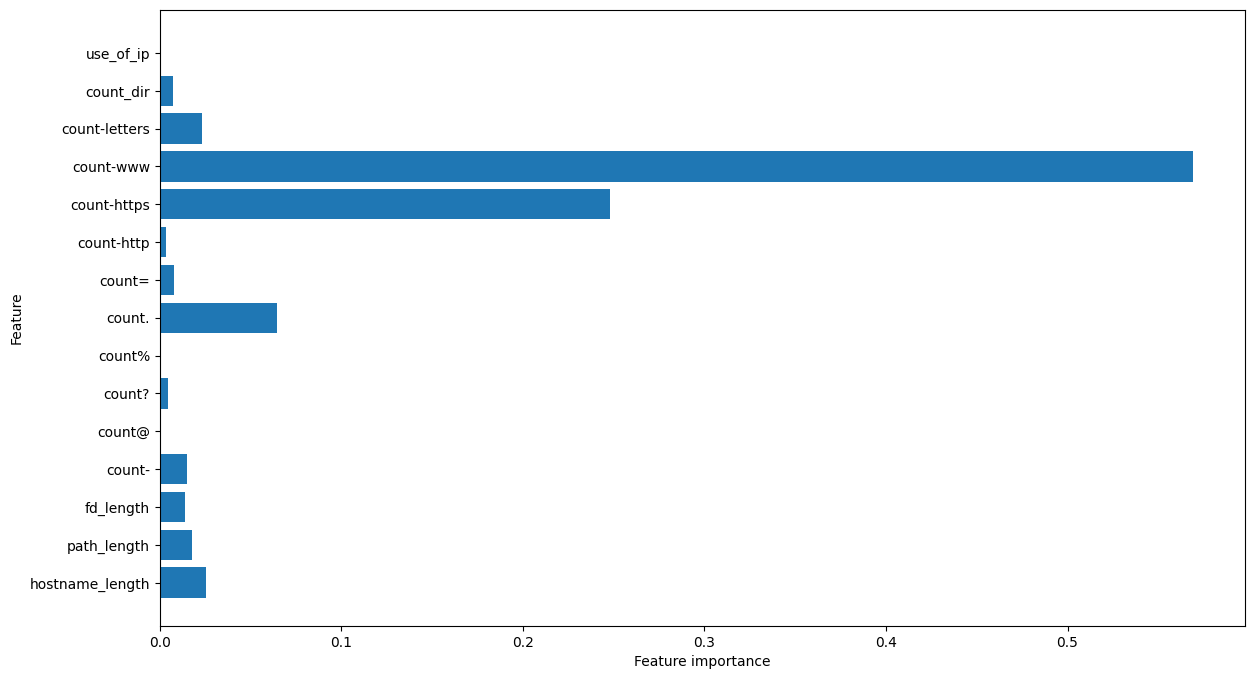

In [29]:

feature_names = ['hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 
       'count-letters', 'count_dir', 'use_of_ip']

plt.figure(figsize=(14,8))
n_features = x_train.shape[1]
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features),feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization ,Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

In [57]:
x_train.shape

(551785, 15)

In [58]:
x_train.shape
model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (15, )))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

model.summary()

e:\Dev'sHouse'25_Phishnet\phishnet\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,185 (4.63 KB)

 Trainable params: 1,185 (4.63 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer= opt ,loss='binary_crossentropy',metrics=['acc'])

In [61]:
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<0.1):
            print("\nReached 0.1 val_loss so cancelling training!")
            self.model.stop_training = True
        
callback = myCallback()

In [62]:
history = model.fit(x_train, y_train, epochs=10,batch_size=256, callbacks=[callback],validation_data=(x_test,y_test),verbose=1)

Epoch 1/10
2156/2156 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.5499 - loss: 0.6845 - val_acc: 0.9267 - val_loss: 0.3528
Epoch 2/10
2145/2156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9594 - loss: 0.2260
Reached 0.1 val_loss so cancelling training!
2156/2156 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.9595 - loss: 0.2256 - val_acc: 0.9902 - val_loss: 0.0638


dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])


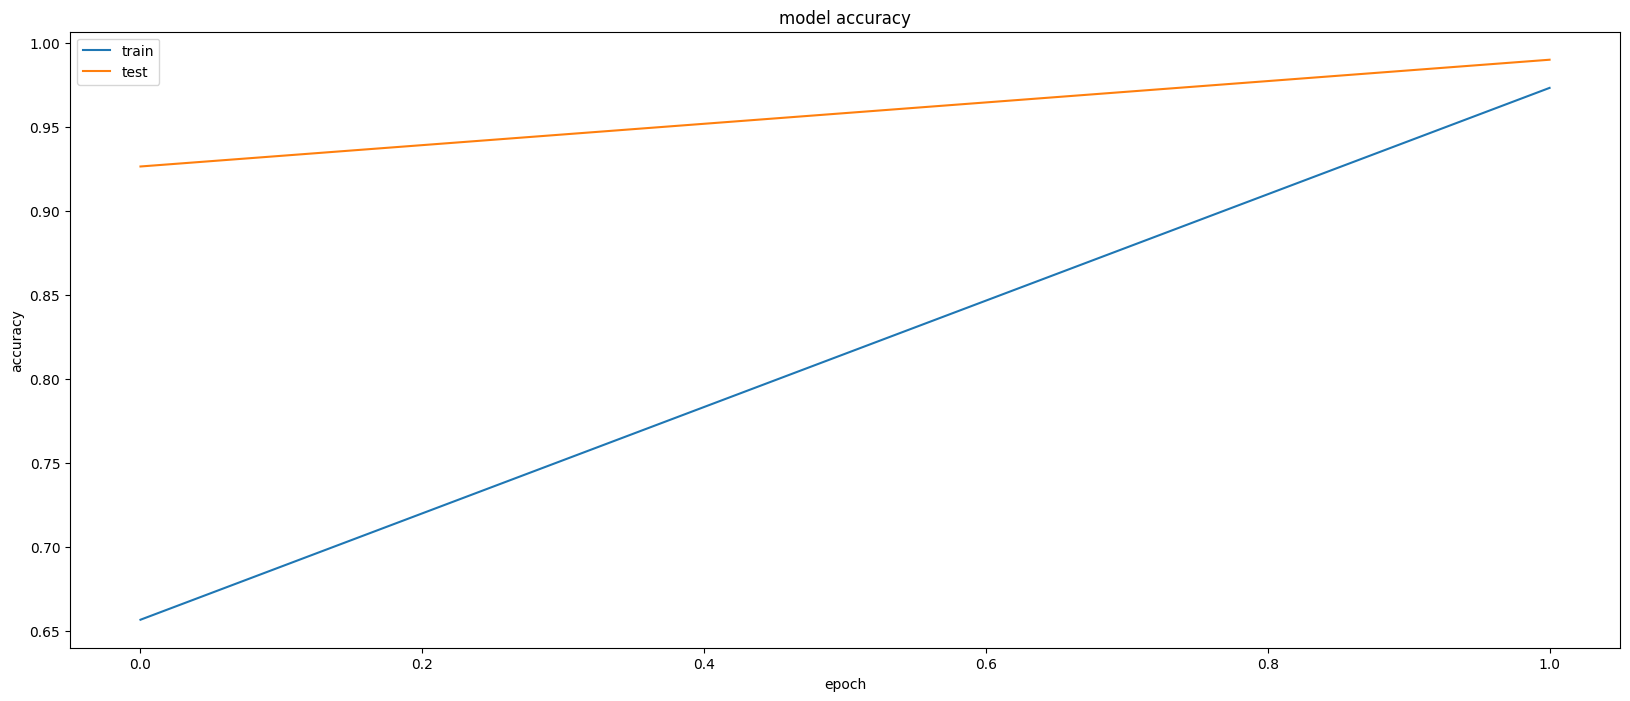

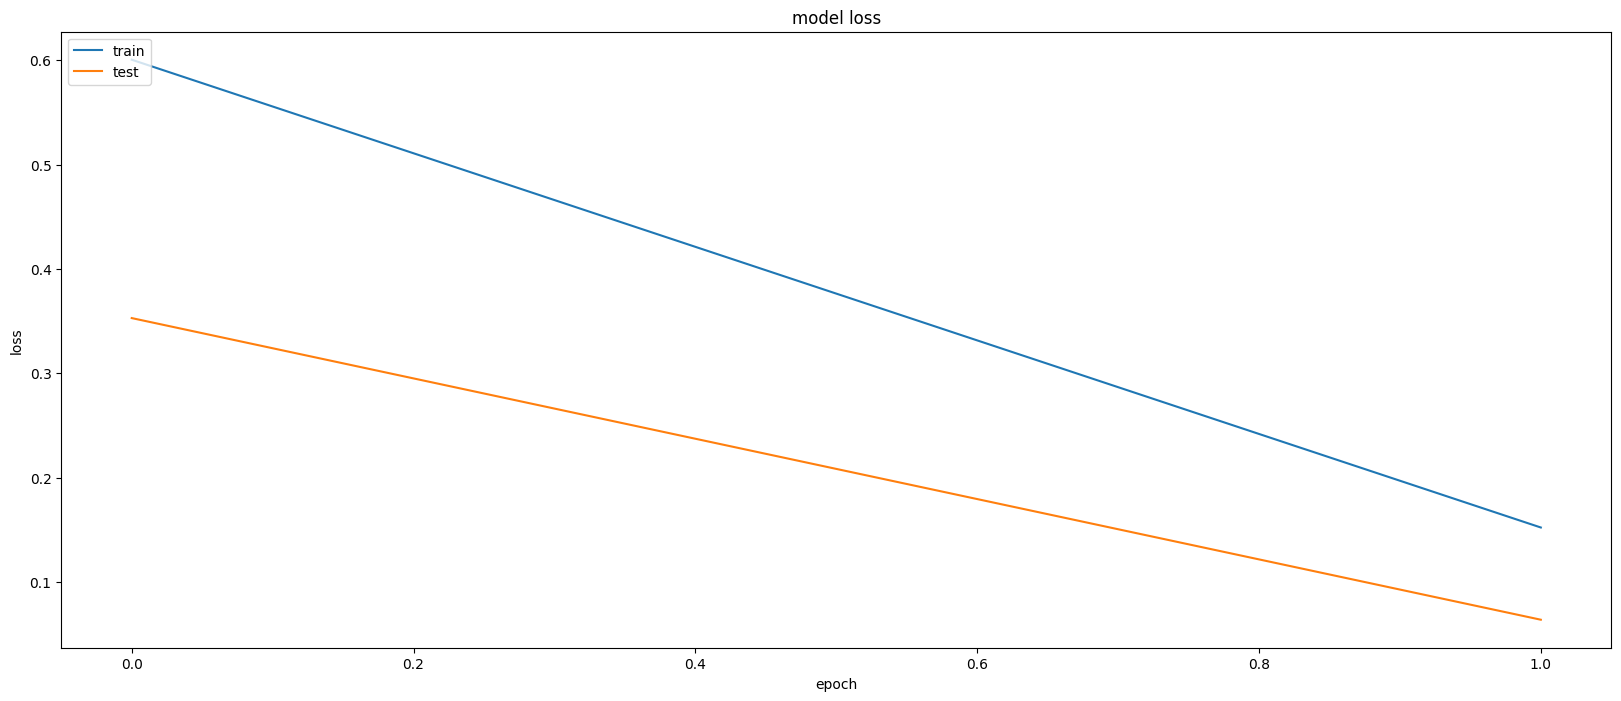

In [63]:
print(history.history.keys())

plt.figure(figsize=(20,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [64]:
loss, acc = model.evaluate(x_test,y_test,verbose=1)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

4311/4311 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - acc: 0.9904 - loss: 0.0638
Test loss: 0.0637536272406578
Test Accuracy: 0.9902136325836182


In [30]:
# predicting on test data.
pred_test = model.predict(x_test)
for i in range (len(pred_test)):
    if (pred_test[i] < 0.5):
        pred_test[i] = 0
    else:
        pred_test[i] = 1
pred_test = pred_test.astype(int)

def view_result(array):
    array = np.array(array)
    for i in range(len(array)):
        if array[i] == 0:
            print("Non Mallicious")
        else:
            print("Mallicious")

print("PREDICTED : ")
view_result(pred_test[:10])
print("\n")
print("ACTUAL : ")
view_result(y_test[:10])

PREDICTED : 
Mallicious
Non Mallicious
Non Mallicious
Mallicious
Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Mallicious
Mallicious


ACTUAL : 
Mallicious
Non Mallicious
Non Mallicious
Mallicious
Mallicious
Non Mallicious
Non Mallicious
Non Mallicious
Mallicious
Mallicious


In [34]:
import pickle

# Assuming you have a model (e.g., a Random Forest Classifier)
# model = your_trained_model

# Save the model as a Pickle file
with open('url_rfc_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [35]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Example list of URLs to fit the vectorizer on (replace with your actual data)
urls = ["https://www.google.com", "http://198.167.140.90/bins.sh", "https://www.music.yahoo.com/manuel-romero/tracks/"]

# Fit the TF-IDF vectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(urls)  # Fit the vectorizer on your URLs

# Save the vectorizer to a file
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# If you're using a Jupyter Notebook, you can also use the following to ensure the file is saved in the working directory:
import os
print(f"Vectorizer saved at: {os.path.abspath('vectorizer.pkl')}")


Vectorizer saved at: e:\Dev'sHouse'25_Phishnet\phishnet\URL\vectorizer.pkl
